# Personalización del entrenamiento --- Ejemplo 1

* 30:00 min | Última modificación: Mayo 12, 2021 | [YouTube]

Adaptado de:

* https://www.tensorflow.org/tutorials/keras/keras_tuner

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

tf.__version__

'2.4.1'

## Generación de datos artificiales

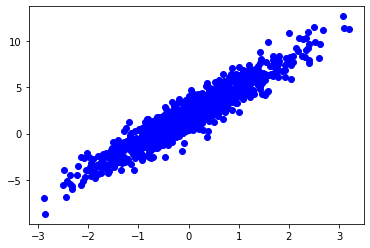

In [2]:
# 
# Coeficientes reales
#
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

#
# Generación de los X alearios
#
x = tf.random.normal(shape=[NUM_EXAMPLES])

#
# Ruido 
#
noise = tf.random.normal(shape=[NUM_EXAMPLES])

#
# Cálculo de Y
#
y = x * TRUE_W + TRUE_B + noise

#
# Gráfico de X vs Y
#
plt.scatter(x, y, c="b")
plt.show()

## Creación del modelo

In [3]:
#
# Se deriva el modelo de la clase Module
#
class MyModel(tf.Module):

    def __init__(self, **kwargs):
        #
        # Llama al constructor de la clase base
        #
        super().__init__(**kwargs)
        
        #
        # Crea las variables y las inicializa en 0.
        # Se pueden utilizar varios inicializadores que
        # estan descritos en tf.keras.initializers
        #
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        #
        # Cómputo del pronóstico
        #
        return self.w * x + self.b

#
# Crea uan instancia del modelo
#
model = MyModel()

#
# Variables del modelo
#
model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

## Definición de la función de pérdida

In [4]:
#
# Error cuadrático medio
#
def loss(target_y, predicted_y):
    return tf.reduce_mean(
        tf.square(target_y - predicted_y),
    )

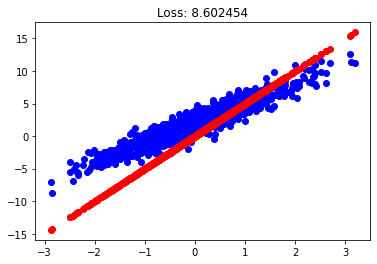

In [5]:
#
# Pronóstico del modelo sin entrenar 
#
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.title('Loss: {:1.6f}'.format(loss(y, model(x)).numpy()))
plt.show()

## Entrenamiento del modelo

In [6]:
def train(model, x, y, learning_rate):

    with tf.GradientTape() as t:
        #
        # Cómputo de la función de pérdida
        #
        current_loss = loss(y, model(x))

    # 
    # Cálculo de la derivada de la pérdida respecto
    # a los parámetros del modelo
    #
    dw, db = t.gradient(current_loss, [model.w, model.b])

    #
    # Mejora según la regla de gradiente descendente
    #
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

Starting: W=5.00 b=0.00, loss=8.60245
Epoch  0: W=4.63 b=0.39, loss=5.97583
Epoch  1: W=4.33 b=0.71, loss=4.25303
Epoch  2: W=4.08 b=0.96, loss=3.12293
Epoch  3: W=3.88 b=1.17, loss=2.38154
Epoch  4: W=3.72 b=1.33, loss=1.89513
Epoch  5: W=3.59 b=1.47, loss=1.57596
Epoch  6: W=3.48 b=1.57, loss=1.36653
Epoch  7: W=3.39 b=1.66, loss=1.22908
Epoch  8: W=3.32 b=1.73, loss=1.13887
Epoch  9: W=3.26 b=1.79, loss=1.07966
Epoch 10: W=3.22 b=1.83, loss=1.04079
Epoch 11: W=3.18 b=1.87, loss=1.01528
Epoch 12: W=3.15 b=1.90, loss=0.99852
Epoch 13: W=3.12 b=1.92, loss=0.98753
Epoch 14: W=3.10 b=1.94, loss=0.98030


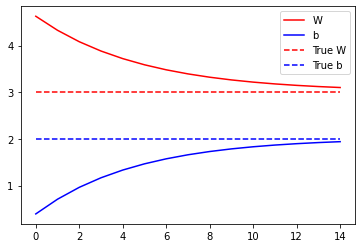

In [7]:
#
# Historia
#
Ws, bs = [], []

EPOCHS = list(range(15))

#
# Entrenamiento
#
def training_loop(model, x, y):

    for epoch in EPOCHS:
        #
        # Llama la función de mejora
        #
        train(model, x, y, learning_rate=0.1)

        #
        # Almacena los valores mejorados
        #
        Ws.append(model.w.numpy())
        bs.append(model.b.numpy())

        #
        # Cómputa la pérdida
        #
        current_loss = loss(y, model(x))

        #
        #  Reporte de progreso de la optimización
        #
        print(
            "Epoch {:2d}: W={:1.2f} b={:1.2f}, loss={:2.5f}".format(
                epoch,
                Ws[-1],
                bs[-1],
                current_loss,
            )
        )


#
# Ejecuta el entrenamiento
#
print(
    "Starting: W={:1.2f} b={:1.2f}, loss={:2.5f}".format(
        model.w.numpy(),
        model.b.numpy(),
        loss(y, model(x)).numpy(),
    )
)

#
# Realiza el entrenamiento
#
training_loop(model, x, y)

#
# Gráfico del resultado
#
plt.plot(EPOCHS, Ws, "r")
plt.plot(EPOCHS, bs, "b")
plt.plot([TRUE_W] * len(EPOCHS), "r--")
plt.plot([TRUE_B] * len(EPOCHS), "b--")
plt.legend(["W", "b", "True W", "True b"])
plt.show()

## Especificación usando Keras

In [8]:
class MyModelKeras(tf.keras.Model):

    def __init__(self, **kwargs):
        #
        # Llama al constructor
        #
        super().__init__(**kwargs)
        #
        # Crea las variables
        #
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def call(self, x):
        #
        # Cómputo del pronóstico
        #
        return self.w * x + self.b


keras_model = MyModelKeras()

training_loop(keras_model, x, y)


Epoch  0: W=4.63 b=0.39, loss=5.97583
Epoch  1: W=4.33 b=0.71, loss=4.25303
Epoch  2: W=4.08 b=0.96, loss=3.12293
Epoch  3: W=3.88 b=1.17, loss=2.38154
Epoch  4: W=3.72 b=1.33, loss=1.89513
Epoch  5: W=3.59 b=1.47, loss=1.57596
Epoch  6: W=3.48 b=1.57, loss=1.36653
Epoch  7: W=3.39 b=1.66, loss=1.22908
Epoch  8: W=3.32 b=1.73, loss=1.13887
Epoch  9: W=3.26 b=1.79, loss=1.07966
Epoch 10: W=3.22 b=1.83, loss=1.04079
Epoch 11: W=3.18 b=1.87, loss=1.01528
Epoch 12: W=3.15 b=1.90, loss=0.99852
Epoch 13: W=3.12 b=1.92, loss=0.98753
Epoch 14: W=3.10 b=1.94, loss=0.98030


In [9]:
#
# Es posible especificar directamente
# el optimizador en la compilación del
# modelo
#

keras_model = MyModelKeras()

keras_model.compile(
    run_eagerly=False,

    #
    # Utiliza el SGD
    #
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    
    #
    # Función de pérdida
    #
    loss=tf.keras.losses.mean_squared_error,
)

_ = keras_model.fit(x, y, epochs=10, batch_size=1000)

Epoch 1/10
1/1 [==============================] - 0s 186ms/step - loss: 8.6025
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 5.9758
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 4.2530
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 3.1229
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3815
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 1.8951
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 1.5760
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1.3665
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2291
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 1.1389
